<a href="https://colab.research.google.com/github/Imran0897/Placement-Assignment_Md_Imran/blob/main/ML_05_Placement_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 92.9 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Placement_Task/ML_05/rideshare_kaggle.csv")

In [ ]:
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
df.dropna(inplace=True)

In [ ]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = df[df['source']=='Haymarket Square']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

In [ ]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

In [ ]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 97.5


id     timestamp  hour  day  month  \
597071  ba1593a1-e4fd-4c7a-a011-e2d4fccbf081  1.543714e+09     1    2     12   

                   datetime          timezone              source destination  \
597071  2018-12-02 01:28:02  America/New_York  Financial District      Fenway   

       cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
597071     Lyft  ...                0.0  1543683600           31.57   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
597071          1543665600           44.65          1543690800   

        apparentTemperatureMin  apparentTemperatureMinTime  \
597071                    28.1                  1543658400   

        apparentTemperatureMax apparentTemperatureMaxTime  
597071                   43.98                 1543690800  

[1 rows x 57 columns]

In [ ]:
df[df['price']==df.price.max()][['latitude','longitude']]

latitude  longitude
597071   42.3503    -71.081

In [ ]:
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)
folium.Marker(location=(42.3503,-71.081)).add_to(map1) 
folium.Marker(location=(42.3378,-71.066)).add_to(map1) 
display(map1)

In [ ]:
new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

Our goal is to make linear regression model. First we check correlation between our features and target feature (price)

First, i want to check the correlation of our temperature related features with our target feature (Price)

In [ ]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [ ]:
df_temp = new_df[temp_cols]
df_temp.head()

temperature  apparentTemperature  temperatureHigh  temperatureLow  \
0        42.34                37.12            43.68           34.19   
1        43.58                37.35            47.30           42.10   
2        38.33                32.93            47.55           33.10   
3        34.38                29.63            45.03           28.90   
4        37.44                30.88            42.18           36.71   

   apparentTemperatureHigh  apparentTemperatureLow  temperatureMin  \
0                    37.95                   27.39           39.89   
1                    43.92                   36.20           40.49   
2                    44.12                   29.11           35.36   
3                    38.53                   26.20           34.67   
4                    35.75                   30.29           33.10   

   temperatureHighTime  temperatureMax  apparentTemperatureMin  \
0           1544968800           43.68                   33.73   
1           1543251600           47.30                   36.20   
2           1543320000           47.55                   31.04   
3           1543510800           45.03                   30.30   
4           1543420800           42.18                   29.11   

   apparentTemperatureMax  price  
0                   38.07    5.0  
1                   43.92   11.0  
2                   44.12    7.0  
3                   38.53   26.0  
4                   35.75    9.0

<Axes: >

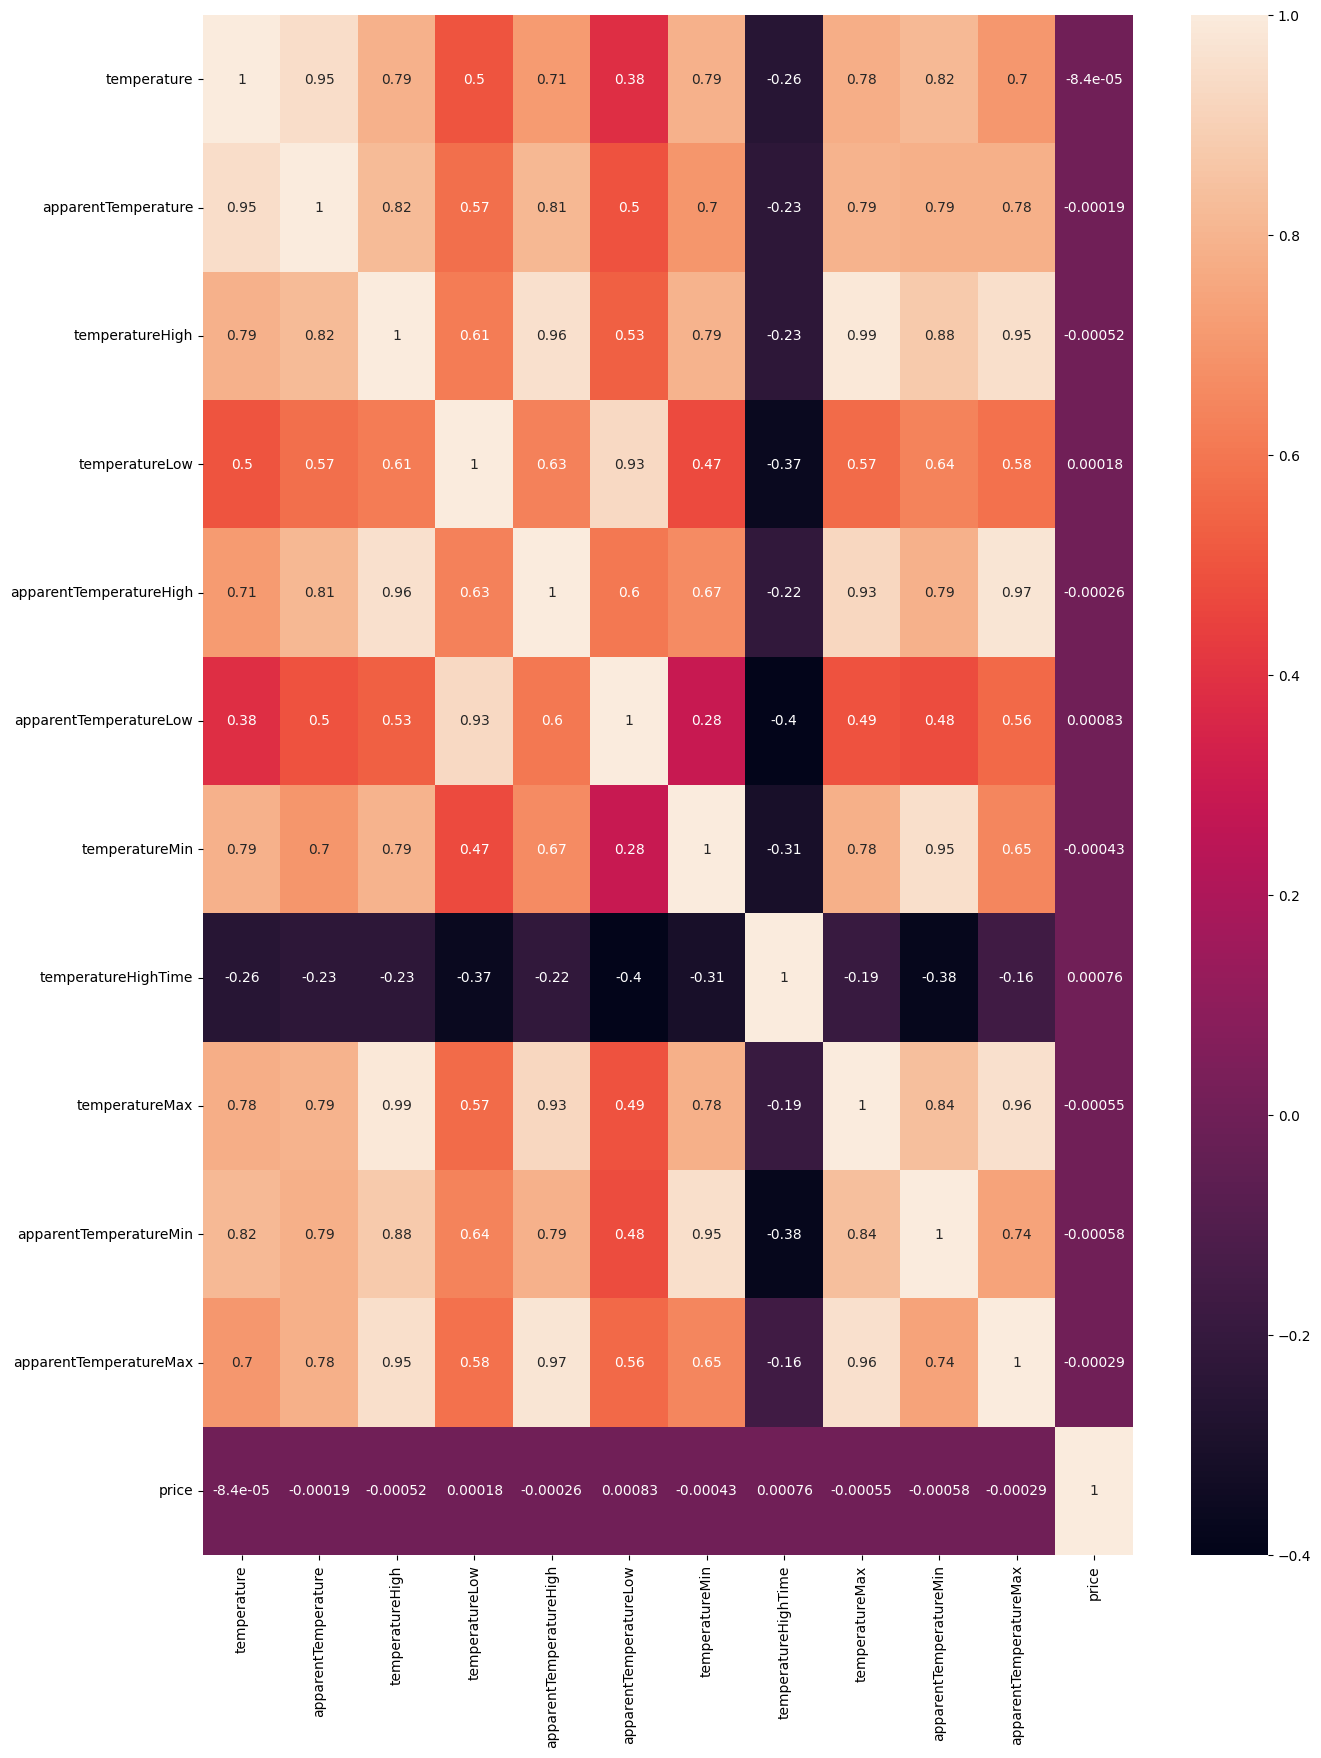

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

We see that all temperature related features have weak correlation with our target feature which is price

Removing all of them will not make any impact to our regression model

In [ ]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(637976, 31)

Second, i want to check the correlation of our cilmate related features with our target feature (Price)

In [ ]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_df[climate_column]
df_clim.head()

precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0           0.0000                0.0      0.68       8.66      9.17   
1           0.1299                1.0      0.94      11.98     11.98   
2           0.0000                0.0      0.75       7.33      7.33   
3           0.0000                0.0      0.73       5.28      5.28   
4           0.0000                0.0      0.70       9.14      9.14   

   visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  \
0      10.000     32.70   1021.98           57        0.72        0  303.8   
1       4.786     41.83   1003.97           90        1.00        0  291.1   
2      10.000     31.10    992.28          240        0.03        0  315.7   
3      10.000     26.64   1013.73          310        0.00        0  291.1   
4      10.000     28.61    998.36          303        0.44        0  347.7   

   moonPhase  precipIntensityMax  price  
0       0.30              0.1276    5.0  
1       0.64              0.1300   11.0  
2       0.68              0.1064    7.0  
3       0.75              0.0000   26.0  
4       0.72              0.0001    9.0

<Axes: >

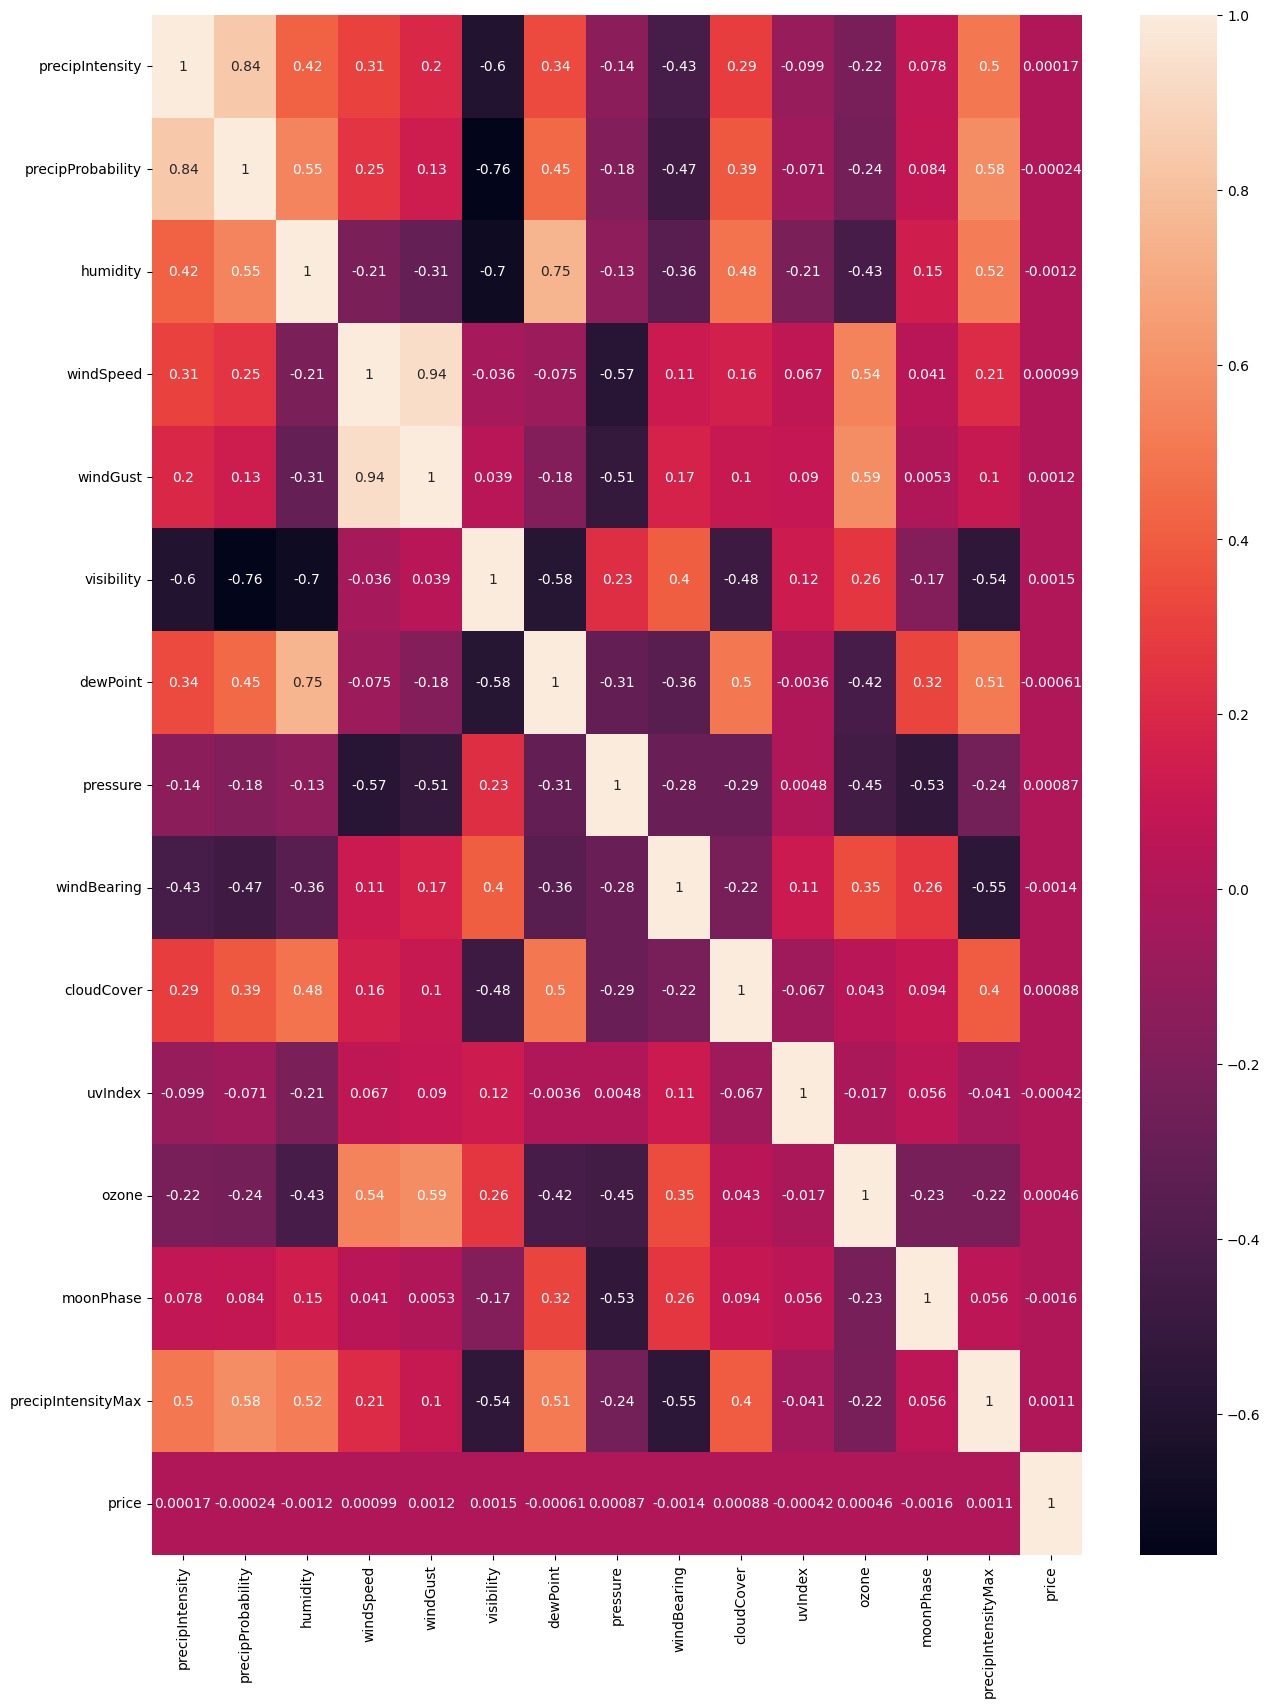

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

Apparently all climate related features also have weak correlation with our target feature which is price
Once again, removing all of them will not make any impact to our regression model

In [ ]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(637976, 17)

Third, i want to check our categorical value in our dataset features

In [ ]:
category_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
for column in new_df[category_col]:
    print(f'{column} : {new_df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

We can see that 'timezone' feature has only 1 value and 'product_id' feature contains many unidentified values. So we can remove or drop them

In [ ]:
new_df = new_df.drop(['timezone','product_id'],axis=1)

In [ ]:
new_df.shape

(637976, 15)

Fourth, i want to check the correlation of our categorical features with our target feature (price)

In [ ]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [ ]:
df_cat_encode

<Axes: >

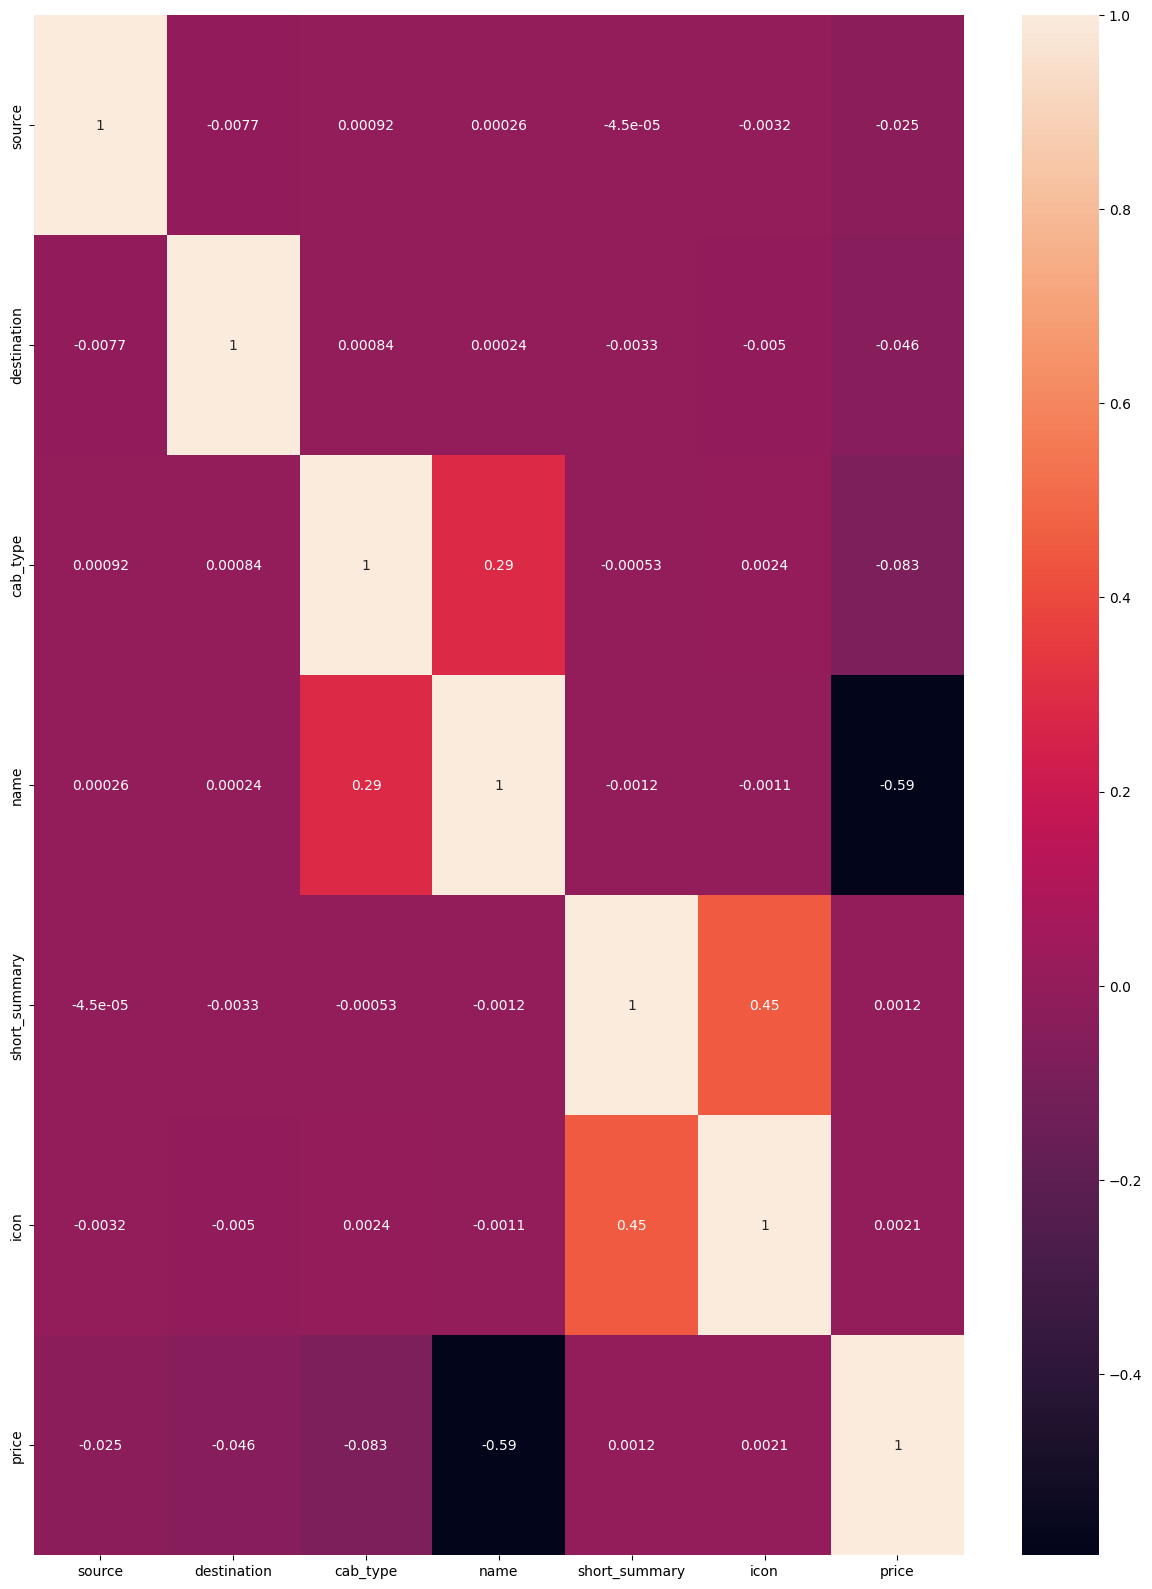

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

We can see only name feature that has a relatively strong correlation. Source,destination, and cab_type features have relatively weak correlation, but i will pick cab_type feature because it has stronger correlation than other two features. I will drop or remove the rest of the columns

In [ ]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

hour  day  month cab_type          name  price  distance  surge_multiplier  \
0     9   16     12     Lyft        Shared    5.0      0.44               1.0   
1     2   27     11     Lyft           Lux   11.0      0.44               1.0   
2     1   28     11     Lyft          Lyft    7.0      0.44               1.0   
3     4   30     11     Lyft  Lux Black XL   26.0      0.44               1.0   
4     3   29     11     Lyft       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  visibility.1  
0   42.2148    -71.033        10.000  
1   42.2148    -71.033         4.786  
2   42.2148    -71.033        10.000  
3   42.2148    -71.033        10.000  
4   42.2148    -71.033        10.000

In [ ]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [ ]:
new_df_onehot=new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)
    
new_df_onehot.head()

hour  day  month  price  distance  surge_multiplier  latitude  longitude  \
0     9   16     12    5.0      0.44               1.0   42.2148    -71.033   
1     2   27     11   11.0      0.44               1.0   42.2148    -71.033   
2     1   28     11    7.0      0.44               1.0   42.2148    -71.033   
3     4   30     11   26.0      0.44               1.0   42.2148    -71.033   
4     3   29     11    9.0      0.44               1.0   42.2148    -71.033   

   visibility.1  cab_type_Lyft  cab_type_Uber  name_Black  name_Black SUV  \
0        10.000              1              0           0               0   
1         4.786              1              0           0               0   
2        10.000              1              0           0               0   
3        10.000              1              0           0               0   
4        10.000              1              0           0               0   

   name_Lux  name_Lux Black  name_Lux Black XL  name_Lyft  name_Lyft XL  \
0         0               0                  0          0             0   
1         1               0                  0          0             0   
2         0               0                  0          1             0   
3         0               0                  1          0             0   
4         0               0                  0          0             1   

   name_Shared  name_UberPool  name_UberX  name_UberXL  name_WAV  
0            1              0           0            0         0  
1            0              0           0            0         0  
2            0              0           0            0         0  
3            0              0           0            0         0  
4            0              0           0            0         0

In [ ]:
df_coordinate = df[['latitude','longitude']]

In [ ]:
df_coordinate.head()

latitude  longitude
0   42.2148    -71.033
1   42.2148    -71.033
2   42.2148    -71.033
3   42.2148    -71.033
4   42.2148    -71.033

Base Model

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=5,n_init=100,init = "k-means++")

In [ ]:
model.fit(df_coordinate)

KMeans(n_clusters=5, n_init=100)

In [ ]:
new_df_onehot['cluster_label'] = model.labels_

In [ ]:
new_df_onehot.head()

hour  day  month  price  distance  surge_multiplier  latitude  longitude  \
0     9   16     12    5.0      0.44               1.0   42.2148    -71.033   
1     2   27     11   11.0      0.44               1.0   42.2148    -71.033   
2     1   28     11    7.0      0.44               1.0   42.2148    -71.033   
3     4   30     11   26.0      0.44               1.0   42.2148    -71.033   
4     3   29     11    9.0      0.44               1.0   42.2148    -71.033   

   visibility.1  cab_type_Lyft  cab_type_Uber  name_Black  name_Black SUV  \
0        10.000              1              0           0               0   
1         4.786              1              0           0               0   
2        10.000              1              0           0               0   
3        10.000              1              0           0               0   
4        10.000              1              0           0               0   

   name_Lux  name_Lux Black  name_Lux Black XL  name_Lyft  name_Lyft XL  \
0         0               0                  0          0             0   
1         1               0                  0          0             0   
2         0               0                  0          1             0   
3         0               0                  1          0             0   
4         0               0                  0          0             1   

   name_Shared  name_UberPool  name_UberX  name_UberXL  name_WAV  \
0            1              0           0            0         0   
1            0              0           0            0         0   
2            0              0           0            0         0   
3            0              0           0            0         0   
4            0              0           0            0         0   

   cluster_label  
0              0  
1              0  
2              0  
3              0  
4              0

In [ ]:
new_df_onehot['cluster_label'].value_counts()

1    217526
3    166025
2     89224
4     83631
0     81570
Name: cluster_label, dtype: int64

In [ ]:
df_price = new_df_onehot[new_df_onehot['cluster_label']==1]

In [ ]:
df_price.head(10)

hour  day  month  price  distance  surge_multiplier  latitude  longitude  \
12    22   30     11   12.0      1.11               1.0   42.3647   -71.0542   
13    10   13     12   16.0      1.11               1.0   42.3647   -71.0542   
14    19   13     12    7.5      1.11               1.0   42.3647   -71.0542   
15    23   16     12    7.5      1.11               1.0   42.3647   -71.0542   
16     0   14     12   26.0      1.11               1.0   42.3647   -71.0542   
17    19   29     11    5.5      1.11               1.0   42.3647   -71.0542   
19     6   16     12   11.0      0.72               1.0   42.3661   -71.0631   
20    19   27     11   16.5      0.72               1.0   42.3661   -71.0631   
21    11   18     12    7.0      0.72               1.0   42.3661   -71.0631   
22     2   30     11    3.5      0.72               1.0   42.3661   -71.0631   

    visibility.1  cab_type_Lyft  cab_type_Uber  name_Black  name_Black SUV  \
12         9.833              0              1           0               0   
13         9.831              0              1           1               0   
14         9.959              0              1           0               0   
15         4.054              0              1           0               0   
16        10.000              0              1           0               1   
17         9.796              0              1           0               0   
19        10.000              1              0           0               0   
20        10.000              1              0           0               0   
21         9.901              1              0           0               0   
22         9.969              1              0           0               0   

    name_Lux  name_Lux Black  name_Lux Black XL  name_Lyft  name_Lyft XL  \
12         0               0                  0          0             0   
13         0               0                  0          0             0   
14         0               0                  0          0             0   
15         0               0                  0          0             0   
16         0               0                  0          0             0   
17         0               0                  0          0             0   
19         0               0                  0          0             1   
20         0               1                  0          0             0   
21         0               0                  0          1             0   
22         0               0                  0          0             0   

    name_Shared  name_UberPool  name_UberX  name_UberXL  name_WAV  \
12            0              0           0            1         0   
13            0              0           0            0         0   
14            0              0           1            0         0   
15            0              0           0            0         1   
16            0              0           0            0         0   
17            0              1           0            0         0   
19            0              0           0            0         0   
20            0              0           0            0         0   
21            0              0           0            0         0   
22            1              0           0            0         0   

    cluster_label  
12              1  
13              1  
14              1  
15              1  
16              1  
17              1  
19              1  
20              1  
21              1  
22              1

In [ ]:
X_price = df_price.drop(columns = 'price')

In [ ]:
y= df_price['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_price, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
# Fit to data training
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9272185841248713

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

6.374739633680441
2.5248246738497393


In [ ]:
my_map = folium.Map(location=[df_price["latitude"].mean(), df_price["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df_price[['latitude', 'longitude']].values.tolist(),color='green'))
my_map